---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
print("X_train.shape ", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_valid.shape", y_valid.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape  (34799, 32, 32, 3)
y_train.shape (34799,)
X_valid.shape (4410, 32, 32, 3)
y_valid.shape (4410,)
X_test.shape (12630, 32, 32, 3)
y_test.shape (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import random
import pandas as pd

n_train = X_train.shape[0]

n_valid= X_valid.shape[0]

n_test = X_test.shape[0]

image_shape = [X_train.shape[1],X_train.shape[2],X_train.shape[3]]  # 32,32,3

# TODO: How many unique classes/labels there are in the dataset.
def getLabelsCount(labels):
    d = dict(zip(labels, [0] * len(labels)))
    for x in labels:
        d[x] += 1
    return d
signsDicts = getLabelsCount(y_train)
print("signsDicts", signsDicts, "\n\n")
n_classes = len(signsDicts)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

signsDicts {41: 210, 31: 690, 36: 330, 26: 540, 23: 450, 1: 1980, 40: 300, 22: 330, 37: 180, 16: 360, 3: 1260, 19: 180, 4: 1770, 11: 1170, 42: 210, 0: 180, 32: 210, 27: 210, 29: 240, 24: 240, 9: 1320, 5: 1650, 38: 1860, 8: 1260, 10: 1800, 35: 1080, 34: 360, 18: 1080, 6: 360, 13: 1920, 7: 1290, 30: 390, 39: 270, 21: 270, 20: 300, 33: 599, 28: 480, 12: 1890, 14: 690, 15: 540, 17: 990, 2: 2010, 25: 1350} 


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


In [5]:
df1 = pd.read_csv('./signnames.csv', delimiter=',')
df1.dataframeName = 'signnames.csv'
print(df1.head(20),"\n")
nRow, nCol = df1.shape
# print('There are nRow {nRow}, nCol {nCol}'.format(nRow=nRow, nCol=nCol))
print(f'There are {nRow} rows and {nCol} columns in signnames.csv.')

    ClassId                                      SignName
0         0                          Speed limit (20km/h)
1         1                          Speed limit (30km/h)
2         2                          Speed limit (50km/h)
3         3                          Speed limit (60km/h)
4         4                          Speed limit (70km/h)
5         5                          Speed limit (80km/h)
6         6                   End of speed limit (80km/h)
7         7                         Speed limit (100km/h)
8         8                         Speed limit (120km/h)
9         9                                    No passing
10       10  No passing for vehicles over 3.5 metric tons
11       11         Right-of-way at the next intersection
12       12                                 Priority road
13       13                                         Yield
14       14                                          Stop
15       15                                   No vehicles
16       16   

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0. Speed limit (20km/h) - Samples: 180


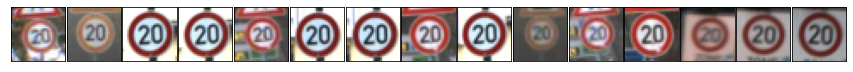

----------------------------------------------------------------------------

1. Speed limit (30km/h) - Samples: 1980


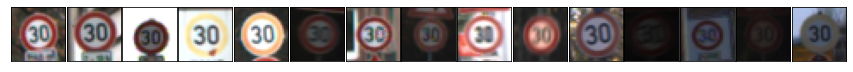

----------------------------------------------------------------------------

2. Speed limit (50km/h) - Samples: 2010


----------------------------------------------------------------------------

3. Speed limit (60km/h) - Samples: 1260


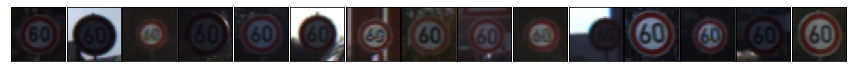

----------------------------------------------------------------------------

4. Speed limit (70km/h) - Samples: 1770


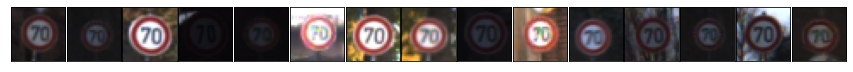

----------------------------------------------------------------------------

5. Speed limit (80km/h) - Samples: 1650


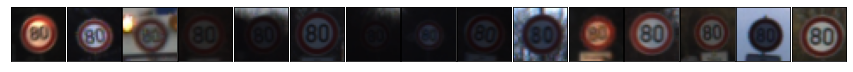

----------------------------------------------------------------------------

6. End of speed limit (80km/h) - Samples: 360


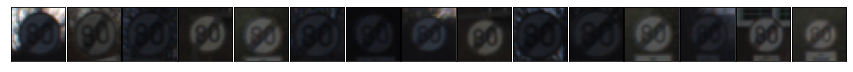

----------------------------------------------------------------------------

7. Speed limit (100km/h) - Samples: 1290


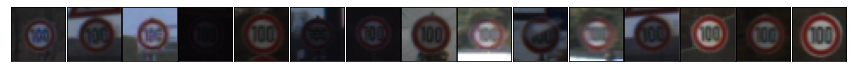

----------------------------------------------------------------------------

8. Speed limit (120km/h) - Samples: 1260


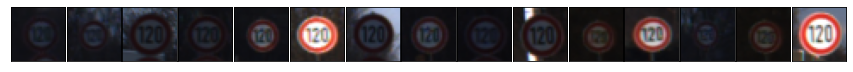

----------------------------------------------------------------------------

9. No passing - Samples: 1320


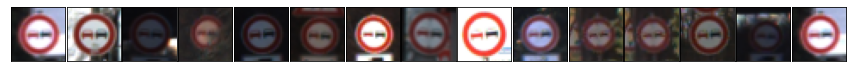

----------------------------------------------------------------------------

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


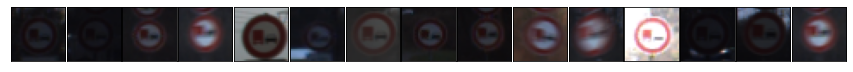

----------------------------------------------------------------------------

11. Right-of-way at the next intersection - Samples: 1170


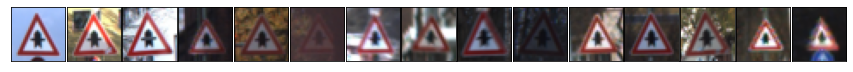

----------------------------------------------------------------------------

12. Priority road - Samples: 1890


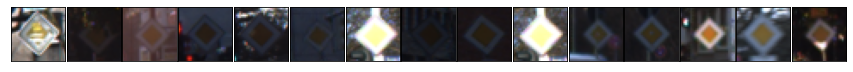

----------------------------------------------------------------------------

13. Yield - Samples: 1920


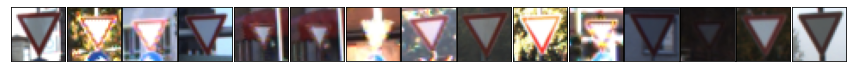

----------------------------------------------------------------------------

14. Stop - Samples: 690


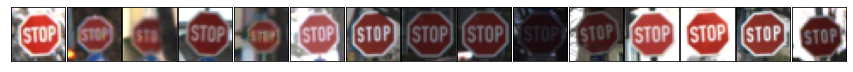

----------------------------------------------------------------------------

15. No vehicles - Samples: 540


----------------------------------------------------------------------------

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


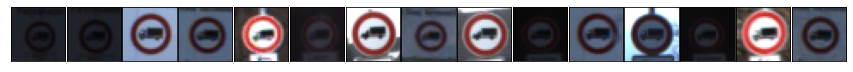

----------------------------------------------------------------------------

17. No entry - Samples: 990


----------------------------------------------------------------------------

18. General caution - Samples: 1080


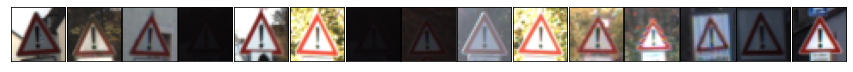

----------------------------------------------------------------------------

19. Dangerous curve to the left - Samples: 180


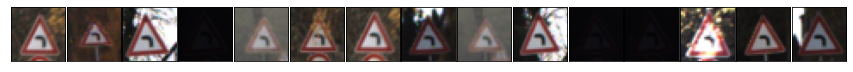

----------------------------------------------------------------------------

20. Dangerous curve to the right - Samples: 300


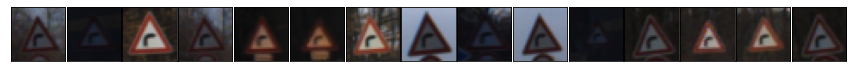

----------------------------------------------------------------------------

21. Double curve - Samples: 270


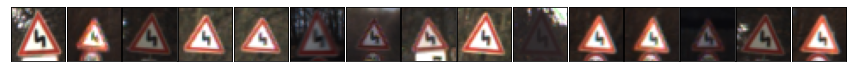

----------------------------------------------------------------------------

22. Bumpy road - Samples: 330


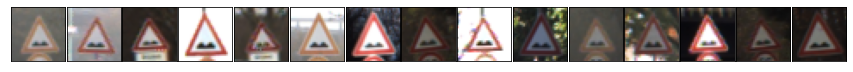

----------------------------------------------------------------------------

23. Slippery road - Samples: 450


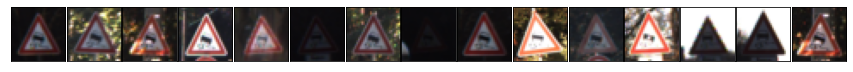

----------------------------------------------------------------------------

24. Road narrows on the right - Samples: 240


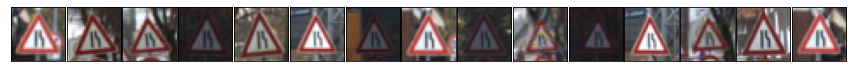

----------------------------------------------------------------------------

25. Road work - Samples: 1350


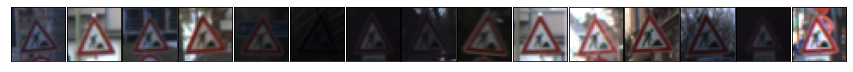

----------------------------------------------------------------------------

26. Traffic signals - Samples: 540


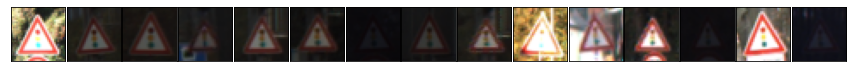

----------------------------------------------------------------------------

27. Pedestrians - Samples: 210


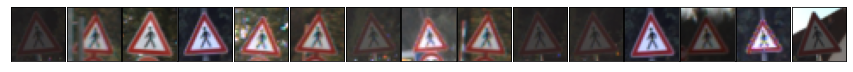

----------------------------------------------------------------------------

28. Children crossing - Samples: 480


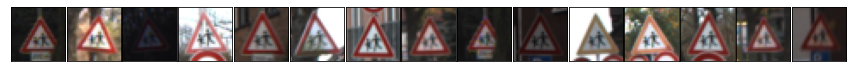

----------------------------------------------------------------------------

29. Bicycles crossing - Samples: 240


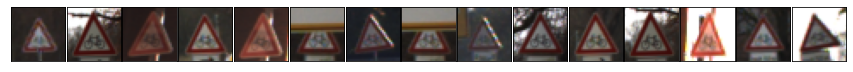

----------------------------------------------------------------------------

30. Beware of ice/snow - Samples: 390


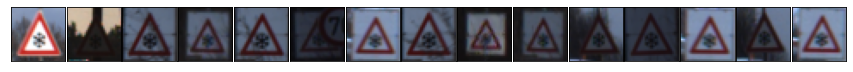

----------------------------------------------------------------------------

31. Wild animals crossing - Samples: 690


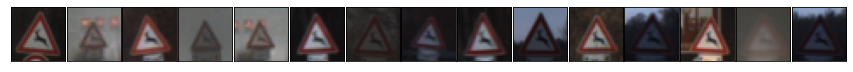

----------------------------------------------------------------------------

32. End of all speed and passing limits - Samples: 210


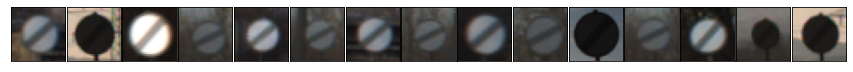

----------------------------------------------------------------------------

33. Turn right ahead - Samples: 599


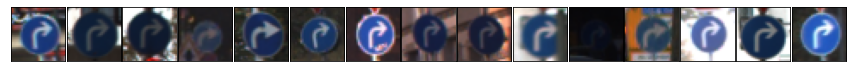

----------------------------------------------------------------------------

34. Turn left ahead - Samples: 360


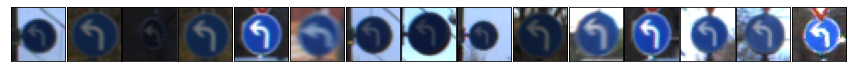

----------------------------------------------------------------------------

35. Ahead only - Samples: 1080


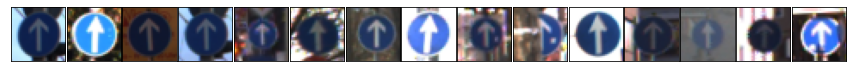

----------------------------------------------------------------------------

36. Go straight or right - Samples: 330


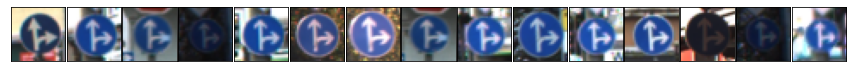

----------------------------------------------------------------------------

37. Go straight or left - Samples: 180


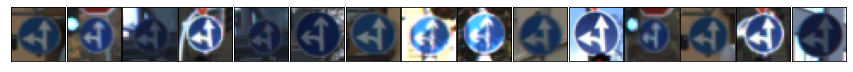

----------------------------------------------------------------------------

38. Keep right - Samples: 1860


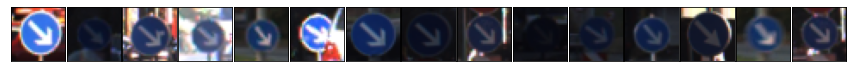

----------------------------------------------------------------------------

39. Keep left - Samples: 270


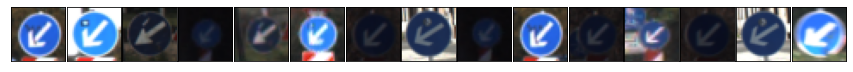

----------------------------------------------------------------------------

40. Roundabout mandatory - Samples: 300


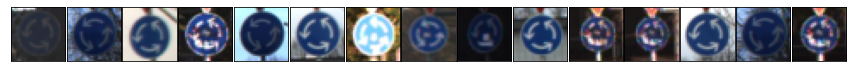

----------------------------------------------------------------------------

41. End of no passing - Samples: 210


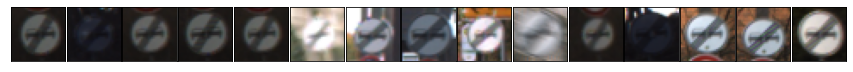

----------------------------------------------------------------------------

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


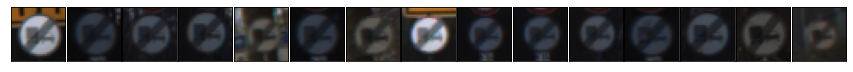

----------------------------------------------------------------------------



In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import cv2

def getSignNames():
    return pd.read_csv('./signnames.csv').values # [[0 'Speed limit (20km/h)'] [1 'Speed limit (30km/h)'] ... ]
 

def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y) # [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 ...]
    for sign in getSignNames():
        print(f"{sign[0]}. {sign[1]} - Samples: {samples_per_sign[sign[0]]}")
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1, examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: 
                axis.imshow(image)
            else:
                axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        print("----------------------------------------------------------------------------\n")
        
plotImages(X_train, y_train)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

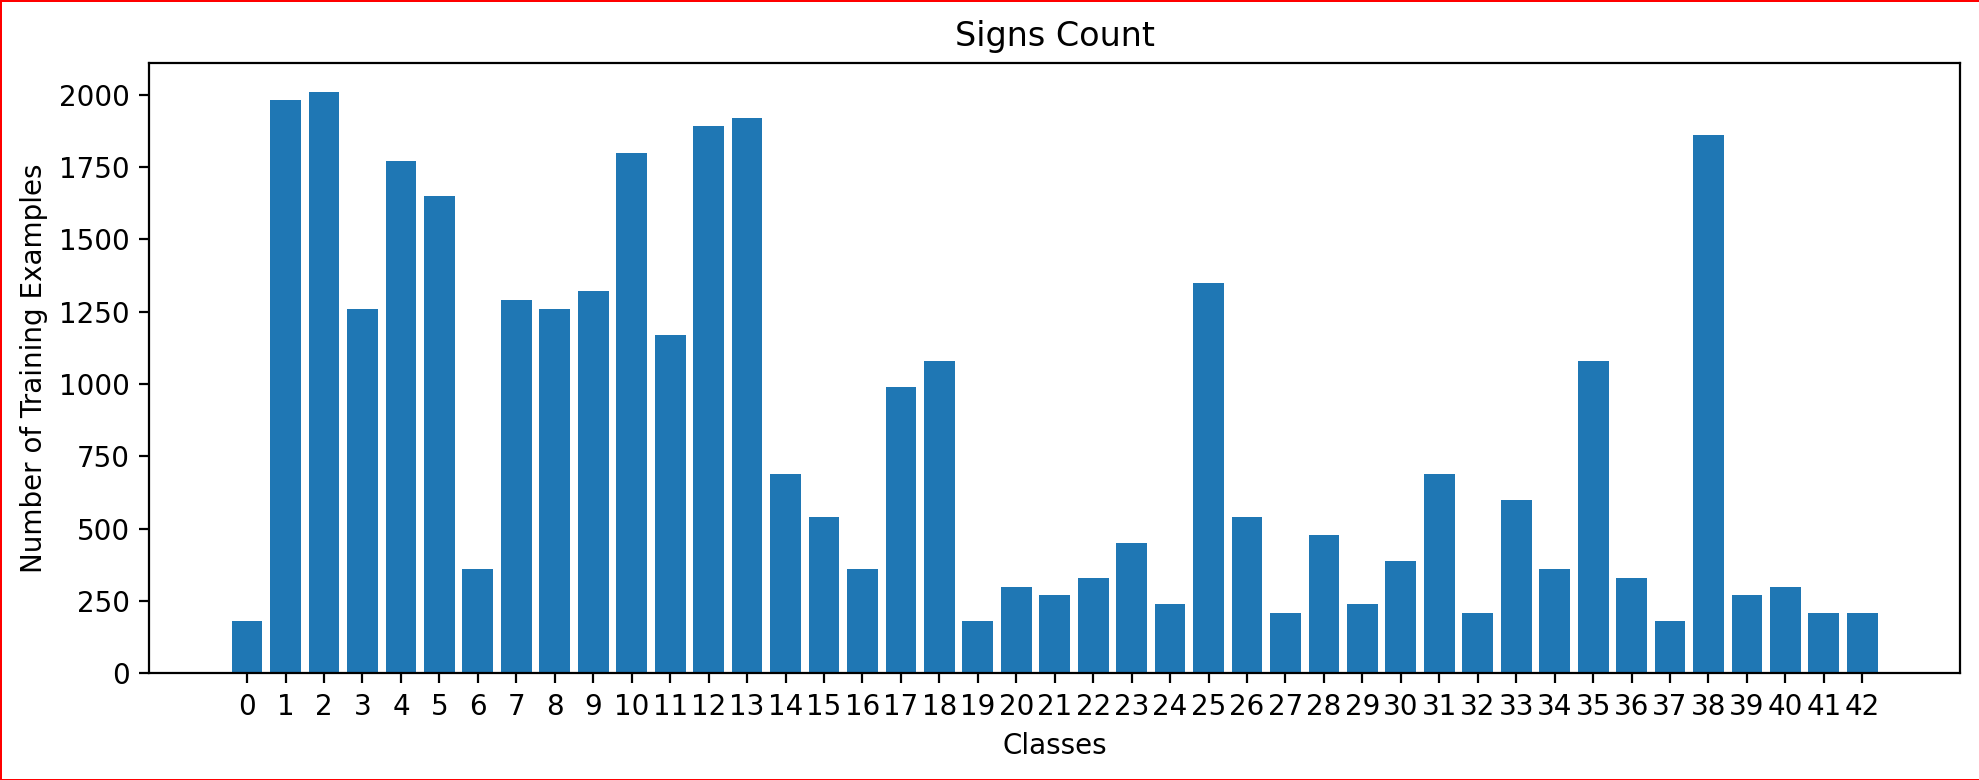

In [7]:
# plot the histogram
signsDicts_sorted = sorted(signsDicts.items(), key = lambda x : x[0])
new_signsDicts = dict(signsDicts_sorted)

fig = plt.figure(figsize=(10, 4), dpi=200, tight_layout=True, linewidth=1, edgecolor='r')

plt.bar(range(len(new_signsDicts)), list(new_signsDicts.values()), align='center')
plt.xticks(range(len(new_signsDicts)), list(new_signsDicts.keys()))
plt.title("Signs Count")
plt.xlabel("Classes")
plt.ylabel("Number of Training Examples")
print(df1)

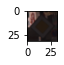

Priority road


In [8]:
signNames = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

index = random.randint(3, len(X_train))
X_train_cnt=len(X_train)
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.tight_layout()
plt.show()
print(signNames[y_train[index]])   

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
tf.compat.v1.disable_eager_execution()

grayconversion_train = tf.image.rgb_to_grayscale(X_train)
with tf.compat.v1.Session() as sess:
    grayscale_train = sess.run(grayconversion_train)
    
grayconversion_valid = tf.image.rgb_to_grayscale(X_valid)
with tf.compat.v1.Session() as sess:
    grayscale_valid = sess.run(grayconversion_valid)
    
grayconversion_test = tf.image.rgb_to_grayscale(X_test)
with tf.compat.v1.Session() as sess:
    grayscale_test = sess.run(grayconversion_test)

X_train_all = np.append(X_train,grayscale_train,axis=3)
X_test_all = np.append(X_test,grayscale_test,axis=3)
X_valid_all = np.append(X_valid,grayscale_valid,axis=3)
print(X_train_all.shape)
print(X_valid_all.shape)
print(X_test_all.shape)

(34799, 32, 32, 4)
(4410, 32, 32, 4)
(12630, 32, 32, 4)


### Model Architecture

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [12]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)

X_train.shape (34799, 32, 32, 3)
X_valid.shape (4410, 32, 32, 3)


In [13]:
total_classes = 43
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(34799, 43)
(4410, 43)


In [14]:
from solve_cudnn_error import *

solve_cudnn_error()

model = Sequential()
model.add(Conv2D(filters=18, kernel_size=(5,5), strides=1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=36, kernel_size=(5,5), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(filters=36, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(units=36, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 18)        1368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 36)        16236     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 36)          32436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
# Compilation of our model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
validation_data = (X_valid, y_valid)

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34784/34799 [============================>.] - ETA: 0s - loss: 1.7838 - accuracy: 0.4837

/home/chenging/anaconda3/envs/test_gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34799/34799 [==============================] - 12s 331us/sample - loss: 1.7832 - accuracy: 0.4838 - val_loss: 0.7550 - val_accuracy: 0.7644
Epoch 2/20
34799/34799 [==============================] - 10s 299us/sample - loss: 0.5082 - accuracy: 0.8404 - val_loss: 0.4274 - val_accuracy: 0.8755
Epoch 3/20
34799/34799 [==============================] - 11s 305us/sample - loss: 0.2998 - accuracy: 0.9101 - val_loss: 0.3500 - val_accuracy: 0.9086
Epoch 4/20
34799/34799 [==============================] - 11s 306us/sample - loss: 0.2204 - accuracy: 0.9363 - val_loss: 0.3698 - val_accuracy: 0.9188
Epoch 5/20
34799/34799 [==============================] - 11s 306us/sample - loss: 0.1733 - accuracy: 0.9492 - val_loss: 0.3096 - val_accuracy: 0.9125
Epoch 6/20
34799/34799 [==============================] - 11s 312us/sample - loss: 0.1433 - accuracy: 0.9593 - val_loss: 0.3558 - val_accuracy: 0.9297
Epoch 7/20
34799/34799 [==============================] - 11s 314us/sample - loss: 0.1180 - accuracy: 0.9

In [16]:
model.save('traffic_recognition_model.h5')

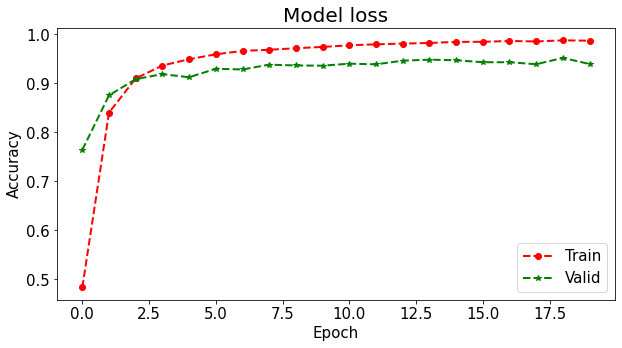

Accuracy of Training =  0.98703986
Accuracy of Validation =  0.9394558


In [17]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],'ro--', linewidth=2)
plt.plot(history.history['val_accuracy'],'g*--', linewidth=2)
plt.title('Model loss', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.legend(['Train', 'Valid'], loc='lower right', fontsize=15)

plt.show()

print("Accuracy of Training = ", history.history['accuracy'][-1])
print("Accuracy of Validation = ", history.history['val_accuracy'][-1])

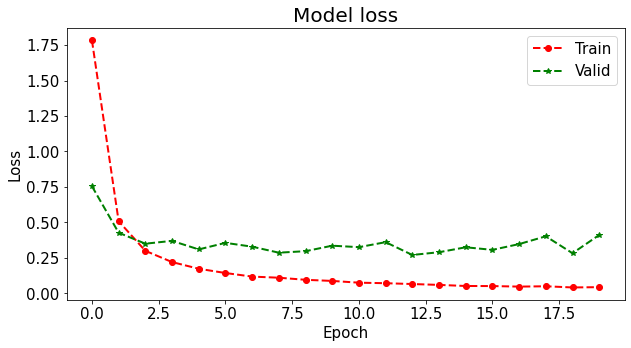

Loss of Training =  0.04355385258170075
Loss of Validation =  0.41133113820190265


In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],'ro--', linewidth=2)
plt.plot(history.history['val_loss'],'g*--', linewidth=2)
plt.title('Model loss', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.legend(['Train', 'Valid'], loc='upper right', fontsize=15)

plt.show()

print("Loss of Training = ", history.history['loss'][-1])
print("Loss of Validation = ", history.history['val_loss'][-1])

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

No entry
(32, 32, 3)


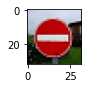

Priority road
(32, 32, 3)


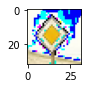

Stop
(32, 32, 3)


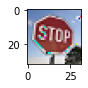

Right-of-way at intersection
(32, 32, 3)


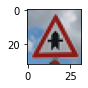

Keep right
(32, 32, 3)


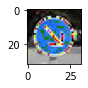

Speed limit (70km/h)
(32, 32, 3)


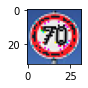

Ahead only
(32, 32, 3)


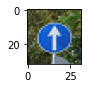

Turn right ahead
(32, 32, 3)


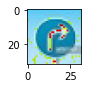

Road work
(32, 32, 3)


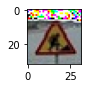

Yield
(32, 32, 3)


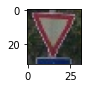

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
NImages = 10
X_real = np.zeros((NImages,32,32,3)).astype(np.uint8)
y_real = np.array([17,12,14,11,38,4,35,33,25,13])
for i in range(NImages):
    image = mpimg.imread('./testImages/'+str(i+1)+'.png')
    image = np.multiply(image,256).astype(np.uint8)[:,:,0:3]
    X_real[i] = image
    print(signNames[y_real[i]])
    print(X_real[i].shape)
    plt.figure(figsize=(1,1))
    plt.imshow(X_real[i])
    plt.show()

### Predict the Sign Type for Each Image

/home/chenging/anaconda3/envs/test_gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


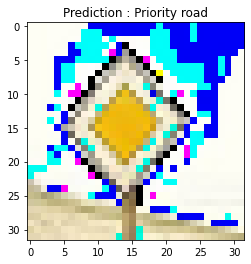

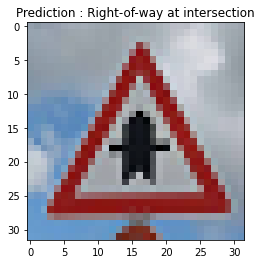

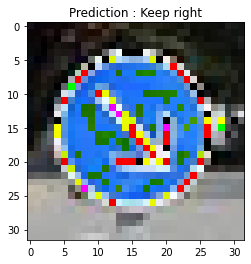

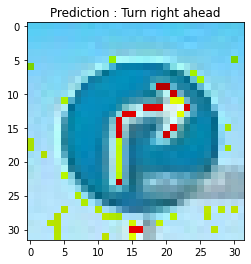

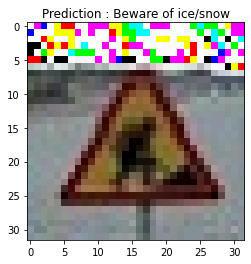

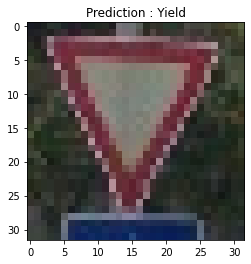

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
for i in range(NImages):
    image = mpimg.imread('./testImages/'+str(i+1)+'.png')
    image = np.multiply(image,256).astype(np.uint8)[:,:,0:3]
    img = image.reshape(1, 32, 32, 3)
    pred = model.predict_classes(img)[0]
    sign = signNames[pred]
    plt.imshow(image)
    plt.title('Prediction : ' + sign)
    plt.show()

### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# Prediction of test set

from sklearn.metrics import accuracy_score
pred = model.predict_classes(X_test[0:10,:,:,:])

#Accuracy with the test data
print(accuracy_score(y_test[0:10], pred))

1.0


In [22]:
print(X_test.shape)
print(y_test.shape)

from sklearn.metrics import accuracy_score
pred = model.predict_classes(X_test)

#Accuracy with the test data
print("Accuracy of Test = ", accuracy_score(y_test, pred))

(12630, 32, 32, 3)
(12630,)


/home/chenging/anaconda3/envs/test_gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy of Test =  0.9275534441805225


In [23]:
# Show the first 10 images of X_test
from PIL import Image
plt.figure(figsize=(64, 64))
plt.tight_layout()
for i in range(10):
    plt.subplot(10, 2, 2*i + 1), plt.axis('off')
    plt.imshow(X_test[i])
    plt.subplot(10, 2, 2*i + 2), plt.axis('off')
    img = Image.open('./Meta/' + str(pred[i]) + '.png')
    plt.imshow(img)